<a href="https://colab.research.google.com/github/mai890107/mai890107/blob/main/dft%E5%AF%A6%E7%8F%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Signal')

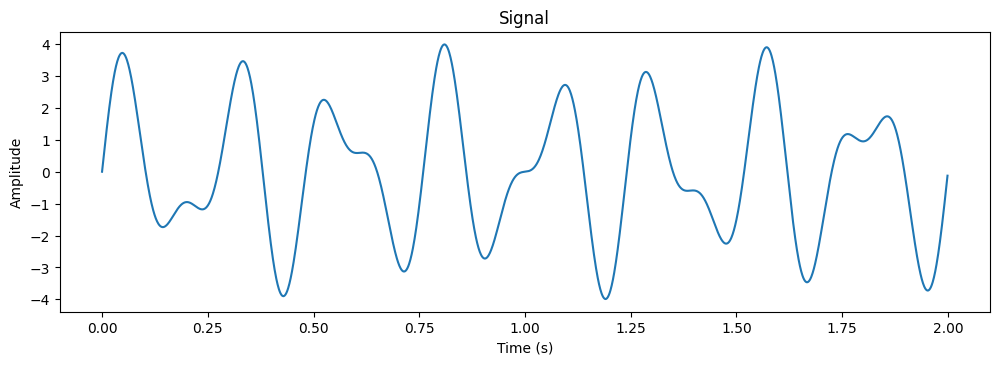

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
srate = 1000  # Sampling rate in Hz
time = np.arange(0., 2., 1/srate)  # Time vector (0 to 2 seconds)
pnts = len(time)  # Number of time points

# Create the signal
signal = 2.5 * np.sin(2 * np.pi * 4 * time) + 1.5 * np.sin(2 * np.pi * 6.5 * time)


# Plot the signal and its components
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')

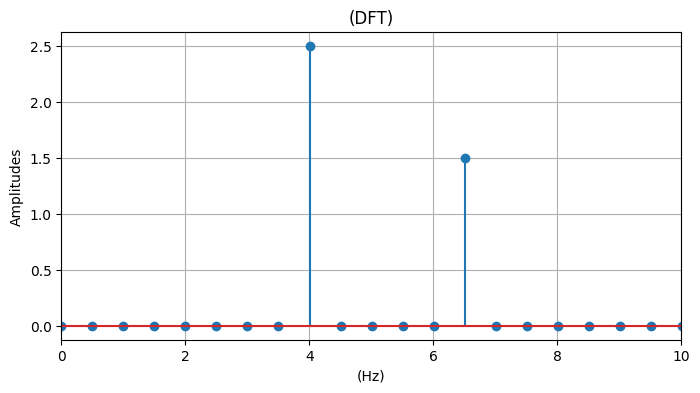

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 取樣率與訊號
srate  = 1000  # 赫茲 (Hz)
time   = np.arange(0., 2., 1/srate)  # 時間向量 (單位：秒)
pnts   = len(time)  # 時間點數量
signal = 2.5 * np.sin(2 * np.pi * 4 * time) + 1.5 * np.sin(2 * np.pi * 6.5 * time)  # 產生訊號

#
def dft(signal):
    N = len(signal)  # Number of time points length
    fourier_coeffs = np.zeros(N, dtype=complex)
    time =  np.array(range(N))/N # time vector

 # Loop over frequencies to compute each specifies frequencies fourier coffeient
    for k in range(N):

        csw = np.exp( -1j*2*np.pi*k*time ) #create complex csw
        fourier_coeffs[k] = np.dot(signal, csw) # doing inner dot between signal and csw

    return fourier_coeffs




# 計算 DFT
fourier_coeffs = dft(signal)
#*** Fourier 係數正規化 ，避免Fourier係數受採樣點而改變
fourier_coeffs = np.abs(fourier_coeffs)/pnts
# 計算振幅頻譜
amplitudes = 2 * np.abs(fourier_coeffs[:pnts//2])  # 只保留正頻率部分
hz = np.linspace(0, srate/2, pnts//2)  # 頻率軸

# 繪製頻譜圖
plt.figure(figsize=(8, 4))
plt.stem(hz, amplitudes)  # 移除 use_line_collection=True

plt.xlabel('(Hz)')
plt.ylabel('Amplitudes')
plt.title('(DFT)')
plt.xlim(0, 10)  # 只顯示 0-10 Hz 的範圍
plt.grid()
plt.show()

